Optimal Threshold: 0.63
Precision: 0.90
Recall: 0.84
F1 Score: 0.87
Sensitivity: 0.84


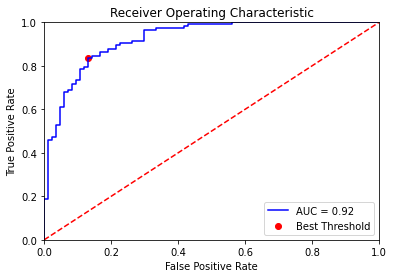

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

# Create a binary classification dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=1
)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a logistic regression model to the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
probs = model.predict_proba(X_test)
preds = probs[:,1]

# Compute metrics
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Select optimal threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
optimal_threshold = thresholds[ix]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

# Use this threshold for classification
y_pred = (probs[:,1] >= optimal_threshold).astype(int)

# Compute metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sensitivity = Recall
sensitivity = recall

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', label='Best Threshold')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
